Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 120, 160, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 58, 78, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 58, 78, 24)    0           conv1_1[0][0]                    
____________________________________________________________________________________________________
conv2_1 (Convolution2D)          (None, 27, 37, 36)    21636       activation_1[0][0]               
___________________________________________________________________________________________

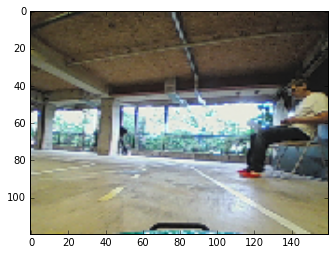

(1, 58, 78)
(1, 120, 160, 1)
(1, 120, 160, 1)
(120, 160, 1)
(58, 78)


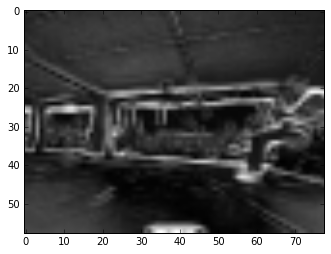

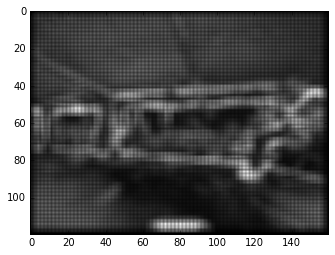

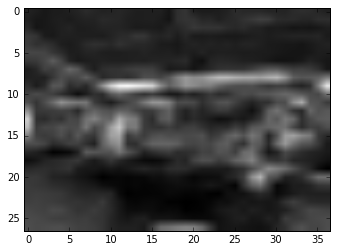

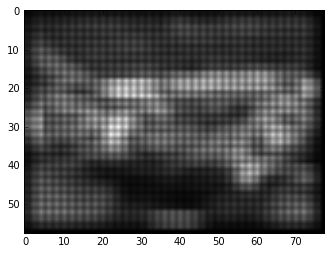

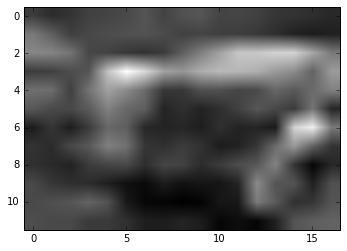

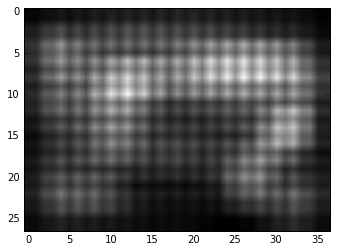

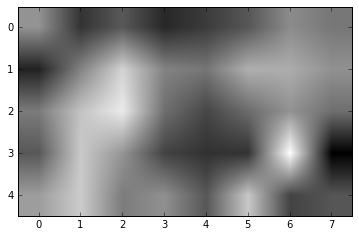

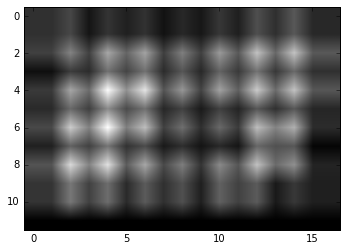

In [1]:
from keras.models import *
from keras.callbacks import *
from keras.layers import Lambda, Convolution2D, Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Lambda, ELU
from keras.layers import Dense, Activation, Reshape, Merge
from keras.layers.pooling import MaxPooling2D, AveragePooling1D
from keras.layers import Merge
import keras.backend as K
import cv2
import argparse
import pickle
from keras.models import load_model
from keras.layers import Convolution2D, MaxPooling2D, Activation, Lambda, Input, Deconvolution2D, Flatten, Dense, Reshape
from keras.layers import Merge
from keras.models import Sequential
from keras import backend as K


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray
from PIL import Image, ImageEnhance, ImageOps

model = load_model("model-20.h5")
model.summary()

car=np.array(Image.open('img_00010064_st_0_th_9459.jpg'))


car_batch = np.expand_dims(car,axis=0)
print(car_batch.shape)
#conv_car = model.predict(car_batch)
steering_angle = float(model.predict(car[None, :, :, :], batch_size=1))
print(steering_angle)

from keras.models import Model
hidden_layer = model.layers[2].output
c1=Lambda(lambda xin: K.mean(xin,axis=3),name='lambda_new_1')(hidden_layer)
r1=Reshape((58,78,1))(c1)
d1 = Deconvolution2D(1, 5, 5,output_shape=(None,120,160, 1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r1)

model2 = Model(input=model.input,output=[c1,d1])
model2.summary()

hidden_layer = model.layers[4].output
c2=Lambda(lambda xin: K.mean(xin,axis=3),name='lambda_new_2')(hidden_layer)
r2=Reshape((27,37,1))(c2)
d2 = Deconvolution2D(1, 5, 5,output_shape=(None,58,78,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r2)

model3 = Model(input=model.input,output=[c2,d2])
model3.summary()


hidden_layer = model.layers[6].output
c3=Lambda(lambda xin: K.mean(xin,axis=3),name='lambda_new_3')(hidden_layer)
r3=Reshape((12,17,1))(c3)
d3 = Deconvolution2D(1, 5, 5,output_shape=(None,27,37,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r3)

model4 = Model(input=model.input,output=[c3,d3])
model4.summary()


hidden_layer = model.layers[8].output
c4=Lambda(lambda xin: K.mean(xin,axis=3),name='lambda_new_4')(hidden_layer)
r4=Reshape((5,8,1))(c4)
d4 = Deconvolution2D(1, 3, 3,output_shape=(None,12,17,1),subsample= (2, 2),border_mode='valid',activation='relu',init='one')(r4)

model5 = Model(input=model.input,output=[c4,d4])
model5.summary()



plt.imshow(car)
plt.show()
conv_cat2 = model2.predict(car[None, :, :, :], batch_size=1)
conv_cat3 = model3.predict(car[None, :, :, :], batch_size=1)
conv_cat4 = model4.predict(car[None, :, :, :], batch_size=1)
conv_cat5 = model5.predict(car[None, :, :, :], batch_size=1)

print (conv_cat2[0].shape)
print (conv_cat2[1].shape)
deconv2 = conv_cat2[1]
deconv3 = conv_cat3[1]
deconv4 = conv_cat4[1]
deconv5 = conv_cat5[1]
print (deconv2.shape)

conv_cat2 = np.squeeze(conv_cat2[0], axis=0)
conv_cat3 = np.squeeze(conv_cat3[0], axis=0)
deconv2 = np.squeeze(deconv2, axis=0)
print(deconv2.shape)
deconv2 = np.squeeze(deconv2, axis=2)

deconv3 = np.squeeze(deconv3, axis=0)
deconv3 = np.squeeze(deconv3, axis=2)

deconv4 = np.squeeze(deconv4, axis=0)
deconv4 = np.squeeze(deconv4, axis=2)

deconv5 = np.squeeze(deconv5, axis=0)
deconv5 = np.squeeze(deconv5, axis=2)


conv_cat4 = np.squeeze(conv_cat4[0], axis=0)
conv_cat5 = np.squeeze(conv_cat5[0], axis=0)
print (conv_cat2.shape)



#conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
#print (conv_cat2.shape)
plt.imshow(conv_cat2,cmap='gray')
plt.show()
plt.imshow(deconv2,cmap='gray')
plt.show()
plt.imshow(conv_cat3,cmap='gray')
plt.show()
plt.imshow(deconv3,cmap='gray')
plt.show()
plt.imshow(conv_cat4,cmap='gray')
plt.show()
plt.imshow(deconv4,cmap='gray')
plt.show()

plt.imshow(conv_cat5,cmap='gray')
plt.show()
plt.imshow(deconv5,cmap='gray')
plt.show()
